In [95]:
import pandas as pd
import os
import openpyxl
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm
import matplotlib.pyplot as plt

In [96]:
# Get the current working directory
# current_working_directory = os.getcwd()
# # Load the Excel file
# file_path = '/Users/minhanhle/Documents/MasterArbeit/Eurostoxx1.xlsx'
# sheet_name = 'Tabelle1'
# # Read the Excel file and skip the first 3 rows and row 5 (row 4 after skipping 3)
# df = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=[0, 1, 2, 4])
# df.head(3)

In [97]:
# # Remove any columns with missing values
# df = df.dropna(axis=1)
# # Convert the first column to datetime format and set it as the index
# df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])
# df.set_index(df.columns[0], inplace=True)
# # Filter the data to include only dates between 01.01.2018 and 01.01.2024
# start_date = '2018-01-01'
# end_date = '2024-01-01'
# df = df[(df.index >= start_date) & (df.index <= end_date)]
# # Define the public holidays in Germany from 2018 to 2024
# holidays = [
#     '2018-01-01', '2018-03-30', '2018-04-02', '2018-05-10', '2018-05-21', '2018-10-03', '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-31',
#     '2019-01-01', '2019-04-19', '2019-04-22', '2019-05-30', '2019-06-10', '2019-10-03', '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-31',
#     '2020-01-01', '2020-04-10', '2020-04-13', '2020-05-21', '2020-06-01', '2020-10-03', '2020-12-24', '2020-12-25', '2020-12-26', '2020-12-31',
#     '2021-01-01', '2021-04-02', '2021-04-05', '2021-05-13', '2021-05-24', '2021-10-03', '2021-12-24', '2021-12-25', '2021-12-26', '2021-12-31',
#     '2022-01-01', '2022-04-15', '2022-04-18', '2022-05-26', '2022-06-06', '2022-10-03', '2022-12-24', '2022-12-25', '2022-12-26', '2022-12-31',
#     '2023-01-01', '2023-04-07', '2023-04-10', '2023-05-18', '2023-05-29', '2023-10-03', '2023-12-24', '2023-12-25', '2023-12-26', '2023-12-31',
#     '2024-01-01'
# ]

# # Convert holidays to datetime format and remove them from the DataFrame
# holidays = pd.to_datetime(holidays)
# df = df[~df.index.isin(holidays)]

# Save the cleaned data to a CSV file without row numbers
# output_path = '/Users/minhanhle/Documents/MasterArbeit/MasterArbeitCode/Cleaned_Eurostoxx.csv'
# df.to_csv(output_path, index=True)

In [98]:
df = pd.read_csv('./Cleaned_Eurostoxx.csv')
df.rename(columns={'Name': 'Datum'}, inplace=True)
df.columns = [col.replace(' (~E )', '') for col in df.columns]
df.set_index('Datum', inplace=True)
df.head(5)

,3I GROUP,A P MOLLER MAERSK B,A2A,AAK,AALBERTS,ABB LTD N,ABN AMRO BANK,ABRDN,ACCIONA,ACCOR,...,WHITBREAD,WIENERBERGER,WIHLBORGS FASTIGHETER,WOLTERS KLUWER,WORLDLINE,WPP,YARA INTERNATIONAL,ZALANDO (XET),ZEALAND PHARMA,ZURICH INSURANCE GROUP
Datum,,,,,,,,,,,,,,,,,,,,,
2018-01-02,10.36,1235.13,1.522,11.74,42.29,21.526,26.84,4.76,68.46,43.48,...,38.45,20.56,4.97,43.46,40.64,15.07,38.67,43.95,11.90,253.275
2018-01-03,10.37,1228.24,1.516,11.79,42.80,21.714,26.81,4.71,68.80,43.31,...,38.37,20.74,5.03,43.70,41.14,14.64,39.22,45.19,12.34,252.397
2018-01-04,10.48,1264.70,1.570,11.97,43.51,21.909,27.06,4.77,70.40,43.60,...,38.57,21.08,5.02,44.07,41.98,14.80,39.10,45.10,12.54,253.429
2018-01-05,10.63,1273.07,1.593,12.13,44.13,22.131,27.23,4.78,71.14,43.77,...,38.67,20.82,5.04,44.55,41.78,15.09,39.77,45.14,12.32,255.630
2018-01-08,10.43,1307.33,1.591,12.18,44.33,22.227,27.42,4.86,71.06,44.38,...,38.54,20.90,5.12,44.50,42.36,15.07,40.66,45.31,12.35,257.668


In [99]:
# Berechnung der täglichen Rendite
returns = np.log(df/ df.shift(1))
returns.index = df.index
returns.head(5)

,3I GROUP,A P MOLLER MAERSK B,A2A,AAK,AALBERTS,ABB LTD N,ABN AMRO BANK,ABRDN,ACCIONA,ACCOR,...,WHITBREAD,WIENERBERGER,WIHLBORGS FASTIGHETER,WOLTERS KLUWER,WORLDLINE,WPP,YARA INTERNATIONAL,ZALANDO (XET),ZEALAND PHARMA,ZURICH INSURANCE GROUP
Datum,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.000965,-0.005594,-0.003950,0.004250,0.011987,0.008696,-0.001118,-0.010560,0.004954,-0.003918,...,-0.002083,0.008717,0.012000,0.005507,0.012228,-0.028949,0.014123,0.027823,0.036308,-0.003473
2018-01-04,0.010552,0.029253,0.035000,0.015152,0.016453,0.008940,0.009282,0.012658,0.022990,0.006674,...,0.005199,0.016261,-0.001990,0.008431,0.020212,0.010870,-0.003064,-0.001994,0.016078,0.004080
2018-01-05,0.014212,0.006596,0.014543,0.013278,0.014149,0.010082,0.006263,0.002094,0.010457,0.003892,...,0.002589,-0.012411,0.003976,0.010833,-0.004776,0.019405,0.016990,0.000887,-0.017700,0.008647
2018-01-08,-0.018994,0.026556,-0.001256,0.004114,0.004522,0.004328,0.006953,0.016598,-0.001125,0.013840,...,-0.003367,0.003835,0.015748,-0.001123,0.013787,-0.001326,0.022132,0.003759,0.002432,0.007941


In [100]:
len(df.columns)

564

In [101]:
# Drop NA
returns = returns.dropna()

#Definiere Gewichte 
gewicht = 1/len(df.columns)

#Definiere Sample/Test Set
sampleSize = len(returns)
windowSize = 250
testWindowSize = sampleSize-windowSize

V = df[windowSize+1:len(df)]*gewicht

In [103]:
#VaR Konfidenzniveau
pVaR = 0.999
#Get Zscores for alpha value
zScore = norm.ppf(pVaR)

#Definiere VaR-Vektoren
normalVaR = np.zeros(testWindowSize)

In [130]:
normalPortfolioSigmas = pd.DataFrame()
normalVaR95 = pd.DataFrame()
portfolioPandL = pd.DataFrame()

<bound method NDFrame.head of            VaR
0     1.567692
1     1.542038
2     1.591441
3     1.637661
4     1.653451
...        ...
1261  2.994132
1262  2.988599
1263  2.981362
1264  2.973088
1265  2.964734

[1266 rows x 1 columns]>


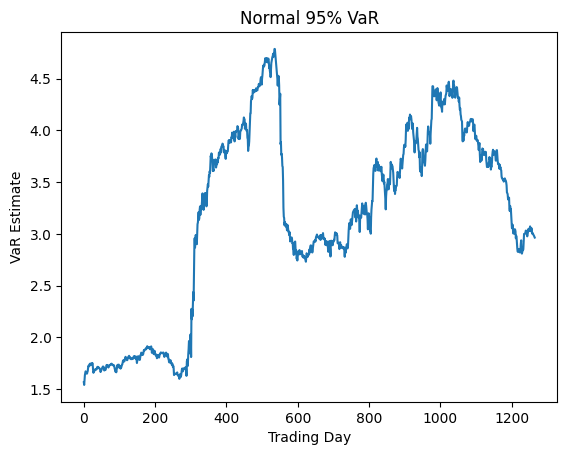

In [143]:
normalPortfolioSigmas = pd.DataFrame()
normalVaR = pd.DataFrame()
portfolioPandL = pd.DataFrame()
for t in range(testWindowSize):
    k = windowSize + t

    # Berechnen der Kovarianzmatrix
    returnsData = returns[t:k]
    covMatrix = np.cov(returnsData, rowvar=False)
    
    # Berechnen der Standardabweichung der Portfolio-Renditen
    v = V.iloc[t, :]
    v_trans = v.T
    sigma = np.sqrt(v@covMatrix@v_trans)
    normalPortfolioSigmas.loc[t,'Sigma'] = sigma

    # Speichern der VaR-Werte
    normalVaR.loc[t,'VaR'] = zScore * sigma
    
    # Speichern der P&L-Werte
    #portfolioPandL[t] = np.sum(returns[k, :] * v)
print(normalVaR.head)
# Plotten der VaR-Werte
plt.plot()
plt.plot(range(0, testWindowSize), normalVaR, label='Normal VaR')
plt.xlabel('Trading Day')
plt.ylabel('VaR Estimate')
plt.title('Normal 99% VaR')
plt.show()
#TODO: x-Achse die Datum angezeigen werden. 